In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime

In [2]:
import warnings;
warnings.filterwarnings('ignore');

In [3]:
path = r'/Users/bryanleavelle/DATA PROJECTS/TIME-SERIES-VIZ'

In [4]:
df = pd.read_csv(os.path.join(path, 'fcc-forum-pageviews.csv'))

# TABLE OF CONTENTS:
<br>check and clean
<br>Task 1: set date as index
<br>Task 2: Filter out extreme values
<br>Task 3: Line Plot
<br>Task 4: Bar Plot
<br>Task 5: Box Plots

# FIRST CHECK AND CLEAN

In [5]:
df.head(5)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [6]:
df.dtypes

date     object
value     int64
dtype: object

In [7]:
#Change date to datetime

df['date'] = pd.to_datetime(df['date'])

In [8]:
#finds mixed data types in all columns in DF

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
  else:
    print('all good')

all good
all good


In [9]:
#check dtypes once more

df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [10]:
# check for missing values
df.isnull().sum()

date     0
value    0
dtype: int64

In [11]:
# check for duplicates

df_dups = df[df.duplicated()]

In [12]:
df_dups

,date,value


### Lookin good

# TASK 1: 
## Import data and set date as index 

Well, I already imported the data, so lets set the index.

In [13]:
# set date as index

df.set_index('date', inplace=True)

In [14]:
#check

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


nice

# TASK 2:

## Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [15]:
#remove top and bottom 2.5% and save as a new DF

df2 = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] > df['value'].quantile(0.025))]

# TASK 3:
## Create a draw_line_plot function that uses Matplotlib to draw a line chart
The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

Not building a function since Im just doing this for myself. Lets build that plot.

Text(0.5, 0, 'Date')

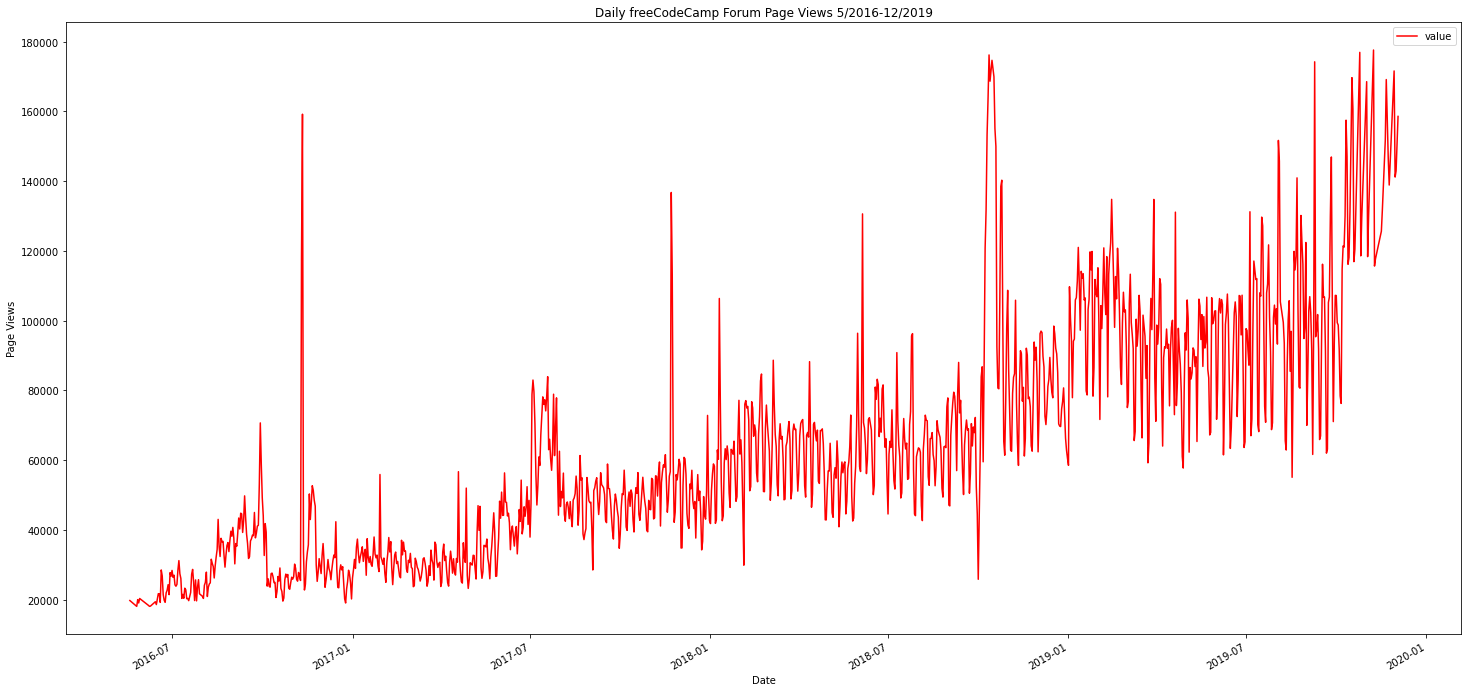

In [16]:
# create line plot
line = df2.plot(color = 'red', figsize = (25,12.5))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019') # set chart label

plt.ylabel('Page Views') # y axis label
plt.xlabel('Date') # x axis label

### beautiful <3 <3

# TASK 4: 
## Create a draw_bar_plot function that draws a bar chart
It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

### since I am just doing this here in Jupyter, I will not be creating a function. Also, Im going to use Seaborn for this instead of matplotlib because I like it more.

In [17]:
#save a new DF

df3 = df2

In [18]:
# make new columns for months and days and year

df3['day'] = df3.index.day
df3['month'] = df3.index.month
df3['year'] = df3.index.year

In [19]:
df3

,value,day,month,year
date,,,,
2016-05-19,19736,19,5,2016
2016-05-26,18060,26,5,2016
2016-05-27,19997,27,5,2016
2016-05-28,19044,28,5,2016
2016-05-29,20325,29,5,2016
...,...,...,...,...
2019-11-24,138875,24,11,2019
2019-11-29,171584,29,11,2019
2019-11-30,141161,30,11,2019


In [20]:
#drop days cause I dont need it lol

df3 = df3.drop(['day'], axis=1)

In [21]:
#reset index

df3 = df3.reset_index()

In [22]:
#drop date cause I dont need it

df3 = df3.drop(['date'], axis=1)

In [23]:
#show dataframe with only the info I need.

df3.head()

,value,month,year
0,19736,5,2016
1,18060,5,2016
2,19997,5,2016
3,19044,5,2016
4,20325,5,2016


In [24]:
#set chart size

sns.set(rc = {'figure.figsize':(13,8)})

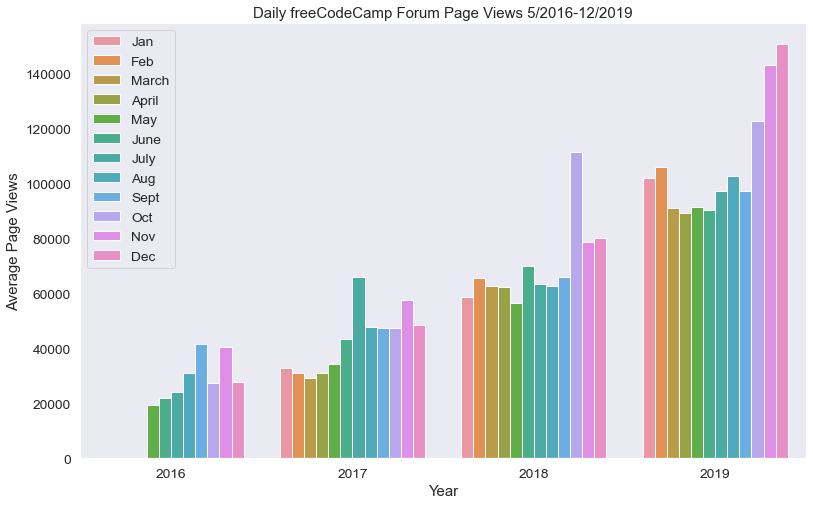

In [25]:
#build the chart!
sns.set_context("notebook", font_scale=1.25)
sns.set_style('dark')
bar = sns.barplot(data=df3, y='value', x='year', hue='month', ci = None)
bar.set(xlabel='Year', ylabel='Average Page Views', title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.legend(labels=["Jan","Feb", 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], loc = 2)

cool! Prettier than matplotlib, too. NEXT/

# TASK 5:
## SIDE-BY-SIDE BOX PLOTS
These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 

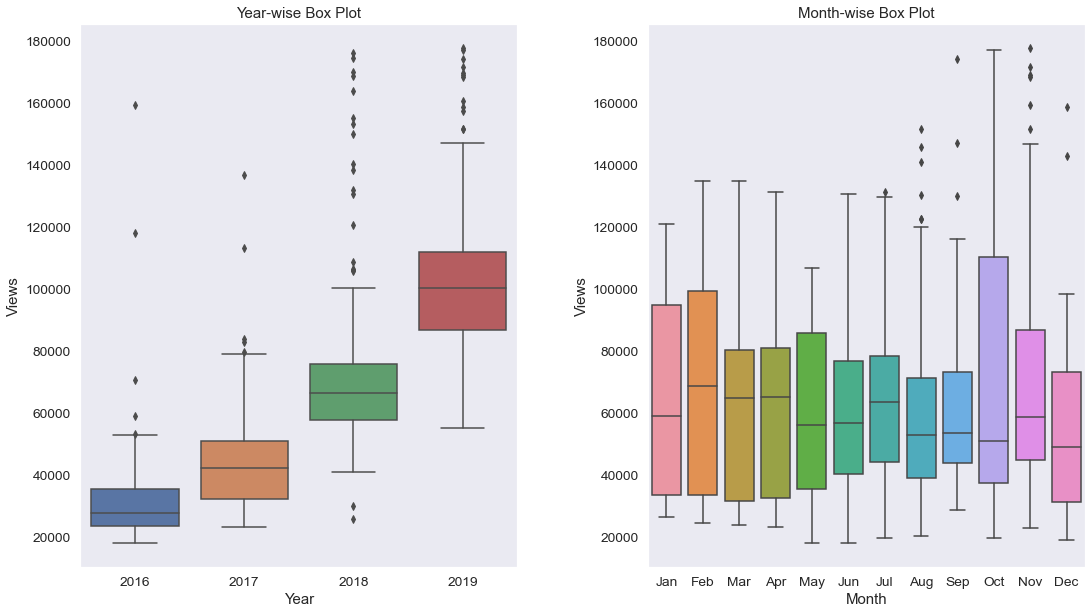

In [27]:
# setup seaborn for 2 side-by-side plots
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,10))

#store month names for eventual renaming of ticks for month plot
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 

#build plots
sns.boxplot(x='year',y='value', data=df3, ax=ax1)  
sns.boxplot(x='month',y='value',data=df3, ax=ax2)    
ax1.set(xlabel = 'Year', ylabel = 'Views')   
ax2.set(xlabel = 'Month', ylabel = 'Views')   
ax2.set_xticklabels(months) #rename ticks from month numbers to month name
ax1.set_title('Year-wise Box Plot')   
ax2.set_title('Month-wise Box Plot')   
plt.subplots_adjust(wspace = 0.3) 

# BOOM

fin